In [1373]:
%load_ext nb_black
# structuring python code

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [1374]:
# Data assessment libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Data visualization libraries
sns.set()

# Removing/setting limits on displayed columns & rows
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

# Splitting training and testing data
from sklearn.model_selection import train_test_split

# To build linear regression model
from sklearn.linear_model import LinearRegression

# Checking model Performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<IPython.core.display.Javascript object>

In [1375]:
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [1376]:
# reading data
data = pd.read_csv("used_cars_data.csv")

# creating a copy of the data
df = data.copy()

<IPython.core.display.Javascript object>

In [1377]:
data.head()  # sample of data to view

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


<IPython.core.display.Javascript object>

In [1378]:
df.drop(["S.No."], axis=1, inplace=True)  # not important to find effects on price

<IPython.core.display.Javascript object>

In [1379]:
df.shape  # number of rows and columns

(7253, 13)

<IPython.core.display.Javascript object>

In [1380]:
print(df.columns)  # column names

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')


<IPython.core.display.Javascript object>

In [1381]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7078 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


<IPython.core.display.Javascript object>

There are 3 data types and the dependent variable is of float type. 

In [1382]:
df.isnull().sum()  # checking for missing values

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price            6247
Price                1234
dtype: int64

<IPython.core.display.Javascript object>

There are a lot of missing values, especially with new car and used car prices. However, most of the columns seem to have data filled in. 

In [1383]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Power,7078,385,74 bhp,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

- The manufacturing dates of the cars range from 1996 to 2019. 
- There seems to be a wide range of kilometers driven, from about 85k to 6.5M
- Most common fuel type seems to be Diesel 
- Most common transmission type is Manual and its mostly first owners that are selling their cars used. 
- Some of the numerically based columns don't have statistical analyses due to being classified as a non-numerical data type, will have to fix that (Mileage, Engine, Power, New Price, Price)

# Data Preprocessing

In [1384]:
# dropping the column containing the target variable
df.dropna(subset=["Price"], inplace=True)

<IPython.core.display.Javascript object>

In [1385]:
# checking for missing values in the rest of the data
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                 143
Seats                  42
New_Price            5195
Price                   0
dtype: int64

<IPython.core.display.Javascript object>

In [1386]:
# starting with entries with no mileage
df[df.Mileage.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.58 Lakh,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,NaN,12.75


<IPython.core.display.Javascript object>

In [1387]:
# mileage has strng so this will convert it to a float so it can be properly, statistically analyzed.
def mileage_to_num(Mileage):
    if isinstance(Mileage, str):
        return float(Mileage.split(" ")[0])
    else:
        return np.nan


mileage_col = ["Mileage"]

for colname in mileage_col:
    df[colname] = df[colname].apply(mileage_to_num)

<IPython.core.display.Javascript object>

In [1388]:
# dropping these because milage cannot be calculated for electric cars
df.dropna(subset=["Mileage"], inplace=True)

<IPython.core.display.Javascript object>

In [1389]:
# resetting dataframe index
df.reset_index(inplace=True, drop=True)

<IPython.core.display.Javascript object>

In [1390]:
# checking for missing values in the rest of the data
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 36
Power                 143
Seats                  42
New_Price            5194
Price                   0
dtype: int64

<IPython.core.display.Javascript object>

### Entries with no Engine Values

In [1391]:
df[df.Engine.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,NaN,NaN,NaN,NaN,2.95
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,2.11
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,NaN,NaN,1.75
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,NaN,NaN,NaN,NaN,26.50
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,NaN,NaN,3.20
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,5.80
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.00,NaN,NaN,NaN,NaN,1.50
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.00,NaN,NaN,NaN,NaN,40.88
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,3.15
2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.00,NaN,NaN,NaN,NaN,1.93


<IPython.core.display.Javascript object>

In [1392]:
# Engine has strng so this will convert it to an int64 so it can be properly, statistically analyzed.
def engine_to_num(Engine):
    if isinstance(Engine, str):
        return int64(Engine.split(" ")[0])
    else:
        return np.nan


engine_col = ["Engine"]

for colname in engine_col:
    df[colname] = df[colname].apply(mileage_to_num)

<IPython.core.display.Javascript object>

In [1393]:
df["Engine"].describe()

count    5981.000000
mean     1621.505935
std       601.117630
min       624.000000
25%      1198.000000
50%      1493.000000
75%      1984.000000
max      5998.000000
Name: Engine, dtype: float64

<IPython.core.display.Javascript object>

Since the values of the engine vary a large amount, I will replace the values with the median as the mean is likely skewed by the large numbers. 

In [1394]:
# fill in engine null values with the median
df["Engine"] = df["Engine"].fillna(df["Engine"].median())

<IPython.core.display.Javascript object>

### Entries with no Power Values

In [1395]:
# power has strng so this will convert it to a float so it can be properly, statistically analyzed.
def power_to_num(Power):
    if isinstance(Power, str):
        return float(Power.split(" ")[0])
    else:
        return np.nan


power_col = ["Power"]

for colname in power_col:
    df[colname] = df[colname].apply(power_to_num)

<IPython.core.display.Javascript object>

In [1396]:
df["Power"].describe()

count    5874.000000
mean      113.272203
std        53.873317
min        34.200000
25%        75.000000
50%        97.700000
75%       138.100000
max       560.000000
Name: Power, dtype: float64

<IPython.core.display.Javascript object>

Power has a wide range of values (34-560) so I will be replace the missing values with the median as it is less affected by skew. 

In [1397]:
# fill in power null values with the median
df["Power"] = df["Power"].fillna(df["Power"].median())

<IPython.core.display.Javascript object>

### Entries with no Seat Values

In [1398]:
df["Seats"].describe()

count    5975.000000
mean        5.278828
std         0.808959
min         0.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        10.000000
Name: Seats, dtype: float64

<IPython.core.display.Javascript object>

The most common seat number seems to be 5 seats. Therefore, I will be filling in empty seat values with the median # of seats, 5.

In [1399]:
# fill in seats null values with the median
df["Seats"] = df["Seats"].fillna(df["Seats"].median())

<IPython.core.display.Javascript object>

In [1400]:
# Look for more missing values
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            5194
Price                   0
dtype: int64

<IPython.core.display.Javascript object>

In [1401]:
# Examining Car Brand names
df["Brand"] = df["Name"].str.split(" ").str[0]  # separating the brand from name column

<IPython.core.display.Javascript object>

In [1402]:
df["Brand"].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

<IPython.core.display.Javascript object>

In [1403]:
# correcting some incorrect names from extracted brands
df.loc[df.Brand == "ISUZU", "Brand"] = "Isuzu"
df.loc[df.Brand == "Mini", "Brand"] = "Mini Cooper"
df.loc[df.Brand == "Land", "Brand"] = "Land Rover"

<IPython.core.display.Javascript object>

### Entries with no New Price Values

In [1404]:
# looking at price range
df["New_Price"].describe()

count            823
unique           540
top       63.71 Lakh
freq               6
Name: New_Price, dtype: object

<IPython.core.display.Javascript object>

The data type is an object so we have to convert it into a float before we can look at the stats of the column

In [1405]:
# changing some crore values to lakhs
def CroreToLakhs(x):
    if str(x).find("Cr") != -1:
        convertedvalue = float(str(x)[:-3]) * 100
        convertedvalue = str(round(convertedvalue, 2)) + " Lakh"
        return converted
    else:
        return x

<IPython.core.display.Javascript object>

In [1406]:
# New Price has strng so this will convert it to a float so it can be properly, statistically analyzed.
def newprice_to_num(New_Price):
    if isinstance(New_Price, str):
        return float(New_Price.split(" ")[0])
    else:
        return np.nan


newprice_col = ["New_Price"]

for colname in newprice_col:
    df[colname] = df[colname].apply(newprice_to_num)

<IPython.core.display.Javascript object>

In [1407]:
# looking at the stats after datatype conversion
df["New_Price"].describe()

count    823.000000
mean      20.328906
std       20.209032
min        1.000000
25%        7.840000
50%       11.390000
75%       24.010000
max       99.920000
Name: New_Price, dtype: float64

<IPython.core.display.Javascript object>

In [1408]:
# getting the median of each car brand based off of given data
df.groupby(["Brand"])["New_Price"].median().sort_values(ascending=False)

Brand
Mercedes-Benz    64.355
BMW              54.700
Jaguar           53.565
Audi             51.770
Volvo            45.670
Mini Cooper      42.300
Isuzu            33.680
Mitsubishi       33.560
Skoda            32.540
Toyota           23.250
Jeep             23.190
Mahindra         11.280
Ford             11.270
Volkswagen       11.105
Honda            10.940
Nissan            9.510
Fiat              9.500
Hyundai           9.290
Maruti            7.910
Tata              7.690
Renault           4.930
Datsun            4.050
Land Rover        1.950
Porsche           1.360
Ambassador          NaN
Bentley             NaN
Chevrolet           NaN
Force               NaN
Lamborghini         NaN
Smart               NaN
Name: New_Price, dtype: float64

<IPython.core.display.Javascript object>

Quite a few of median values are missing here and the values seem to be skewed as well so I will go ahead and use the overall median

In [1409]:
# fill in New Prices null values with the median
df["New_Price"] = df["New_Price"].fillna(df["New_Price"].median())


<IPython.core.display.Javascript object>

In [1410]:
# checking for any more missing values
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
Brand                0
dtype: int64

<IPython.core.display.Javascript object>

In [1411]:
# processing Year to find age of car
df["Current_year"] = 2021
df["Car_Age"] = df["Current_year"] - df["Year"]
df.drop("Current_year", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [1412]:
# double checking dataframe to see results
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,11.39,1.75,Maruti,11
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,11.39,12.50,Hyundai,6
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,Honda,10
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.39,6.00,Maruti,9
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,11.39,17.74,Audi,8


<IPython.core.display.Javascript object>

In [1413]:
# converting categorical variables to dtype category
df["Fuel_Type"] = df["Fuel_Type"].astype("category")
df["Transmission"] = df["Transmission"].astype("category")
df["Owner_Type"] = df["Owner_Type"].astype("category")
df["Location"] = df["Location"].astype("category")
df["Brand"] = df["Brand"].astype("category")

<IPython.core.display.Javascript object>

In [1414]:
# checking to see whether dtype successfully converted
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6017 entries, 0 to 6016
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               6017 non-null   object  
 1   Location           6017 non-null   category
 2   Year               6017 non-null   int64   
 3   Kilometers_Driven  6017 non-null   int64   
 4   Fuel_Type          6017 non-null   category
 5   Transmission       6017 non-null   category
 6   Owner_Type         6017 non-null   category
 7   Mileage            6017 non-null   float64 
 8   Engine             6017 non-null   float64 
 9   Power              6017 non-null   float64 
 10  Seats              6017 non-null   float64 
 11  New_Price          6017 non-null   float64 
 12  Price              6017 non-null   float64 
 13  Brand              6017 non-null   category
 14  Car_Age            6017 non-null   int64   
dtypes: category(5), float64(6), int64(3), object(1)
memory 

<IPython.core.display.Javascript object>

In [1415]:
# further data analysis now that it's relatively cleaned up
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age
count,6017.000000,6.017000e+03,6017.000000,6017.000000,6017.000000,6017.000000,6017.000000,6017.000000,6017.000000
mean,2013.358152,5.874228e+04,18.134961,1620.737078,112.902114,5.276882,12.612656,9.478340,7.641848
std,3.269967,9.128375e+04,4.582289,599.398319,53.282014,0.806464,8.077039,11.189605,3.269967
min,1998.000000,1.710000e+02,0.000000,624.000000,34.200000,0.000000,1.000000,0.440000,2.000000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,78.000000,5.000000,11.390000,3.500000,5.000000
50%,2014.000000,5.300000e+04,18.150000,1493.000000,97.700000,5.000000,11.390000,5.640000,7.000000
75%,2016.000000,7.300000e+04,21.100000,1969.000000,138.030000,5.000000,11.390000,9.950000,10.000000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,99.920000,160.000000,23.000000


<IPython.core.display.Javascript object>

- Years is skewed to the left as most cars seem to be centered around the year 2014.
- The age of the cars ranges from 2 years to 23 years
- Mileage seems to be evenly distributed as the mean and median fall along the same number
- Power is also almost evenly distributed
- The new prices and current prices are also skewed as 99 lakhs and 160 lakhs, respecticely, are much higher numbers than most of the data.

In [1416]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,11.39,1.75,Maruti,11
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,11.39,12.50,Hyundai,6
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,Honda,10
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.39,6.00,Maruti,9
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,11.39,17.74,Audi,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6012,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,7.88,4.75,Maruti,7
6013,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,11.39,4.00,Hyundai,6
6014,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,11.39,2.90,Mahindra,9
6015,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,11.39,2.65,Maruti,8


<IPython.core.display.Javascript object>

In [1417]:
df.shape

(6017, 15)

<IPython.core.display.Javascript object>

### Univariate


In [1418]:
# Code to cleanly display features during univariate analysis


def histogram_boxplot(feature, figsize=(15, 10), bins=None):

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        feature.mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

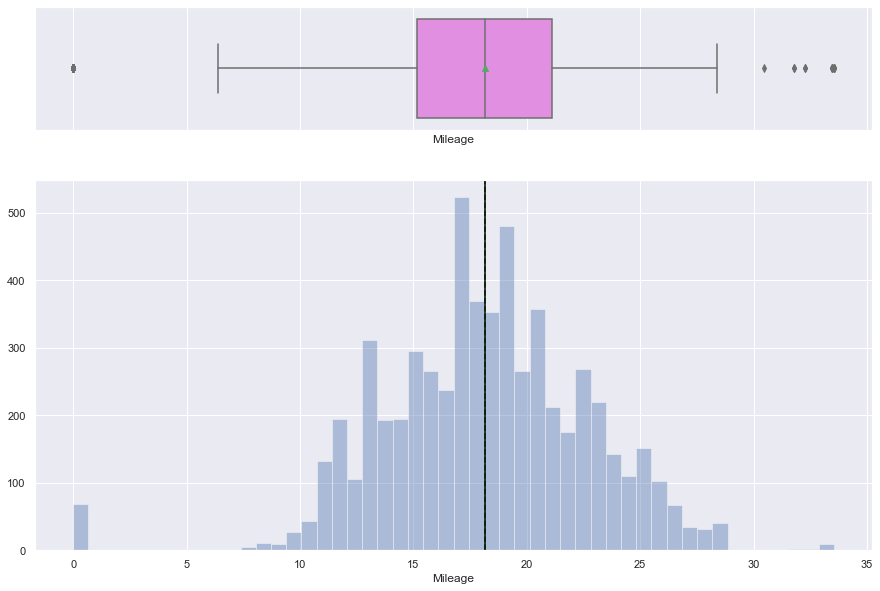

<IPython.core.display.Javascript object>

In [1419]:
histogram_boxplot(df["Mileage"])

- The boxplot and histogram show a normal distribution

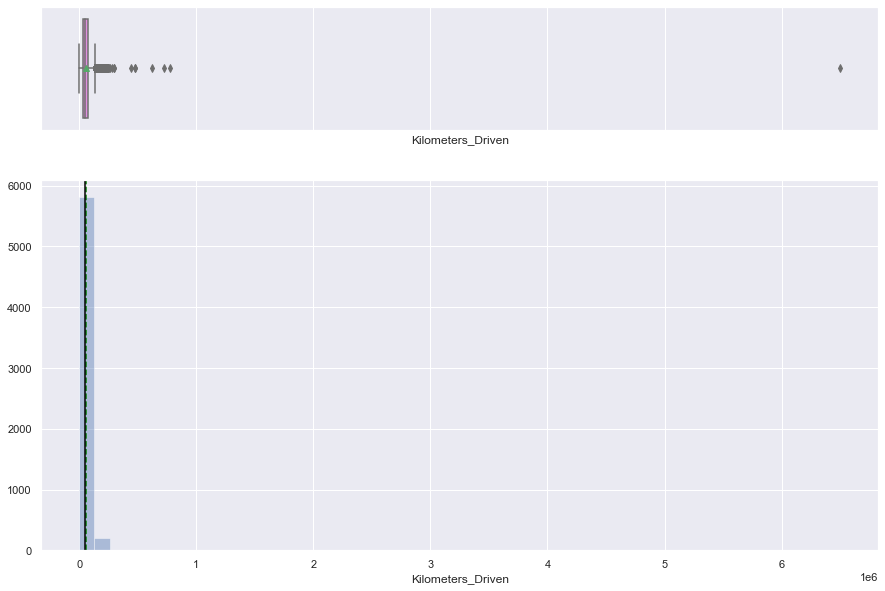

<IPython.core.display.Javascript object>

In [1420]:
histogram_boxplot(df["Kilometers_Driven"])

- The plots for the kilometers driven is very right skewed with a clear outlier.

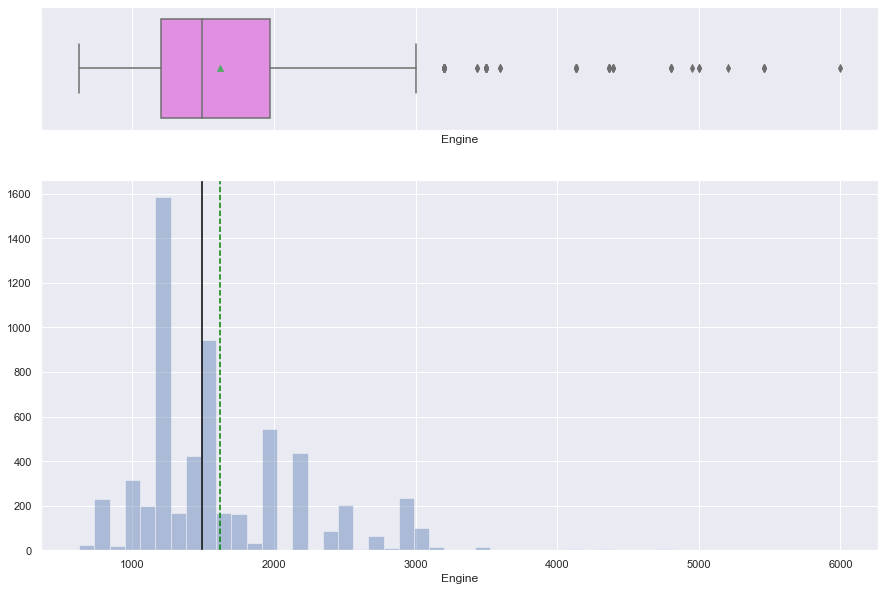

<IPython.core.display.Javascript object>

In [1421]:
histogram_boxplot(df["Engine"])

- The engine values are roughly normally distributed, however there are a good amount of outliers according to the boxplot

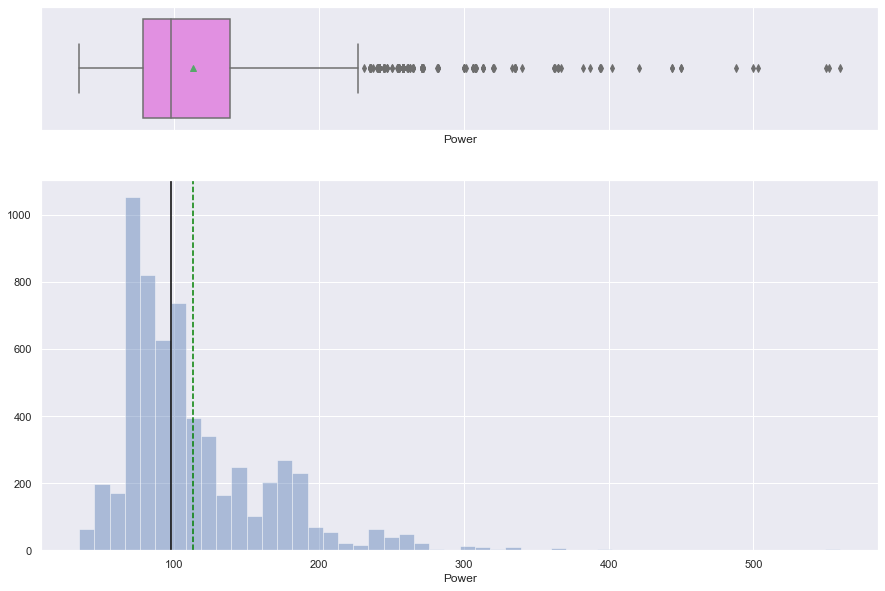

<IPython.core.display.Javascript object>

In [1422]:
histogram_boxplot(df["Power"])

Power seems almost relatively normally distributed with some right skew according to the boxplot and histogram.

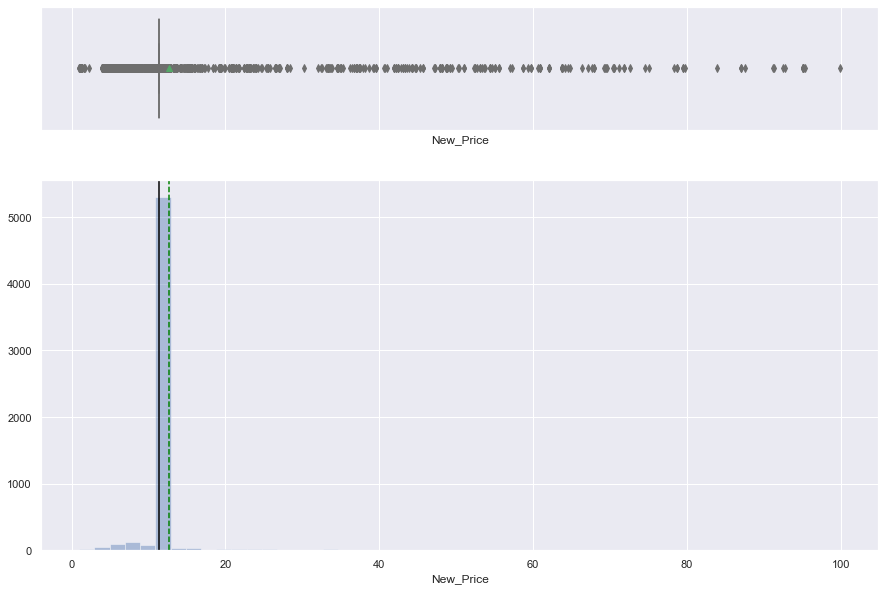

<IPython.core.display.Javascript object>

In [1423]:
histogram_boxplot(df["New_Price"])

- Distribution is very right skewed and most new prices fall near 12 INR Lakhs.

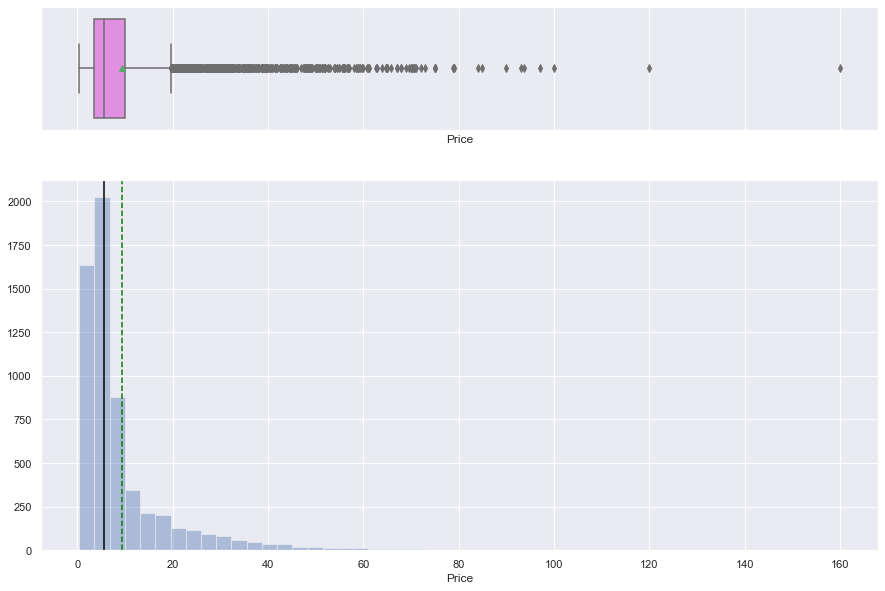

<IPython.core.display.Javascript object>

In [1424]:
histogram_boxplot(df["Price"])  # Target Variable

- Target variable is pretty right skewed with most prices being from 0-10 INR Lakhs

In [1425]:
# getting a categorical bar graph to show percentage on top
def percent_bar(data, z):

    total = len(data[z])  # length of the column
    plt.figure(figsize=(15, 5))
    plt.xticks(rotation=45)
    ax = sns.countplot(data[z], palette="Paired")
    for p in ax.patches:
        percentage = "{:.1f}%".format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()

        ax.annotate(percentage, (x, y), size=10)  # annotating the percentage
    plt.show()

<IPython.core.display.Javascript object>

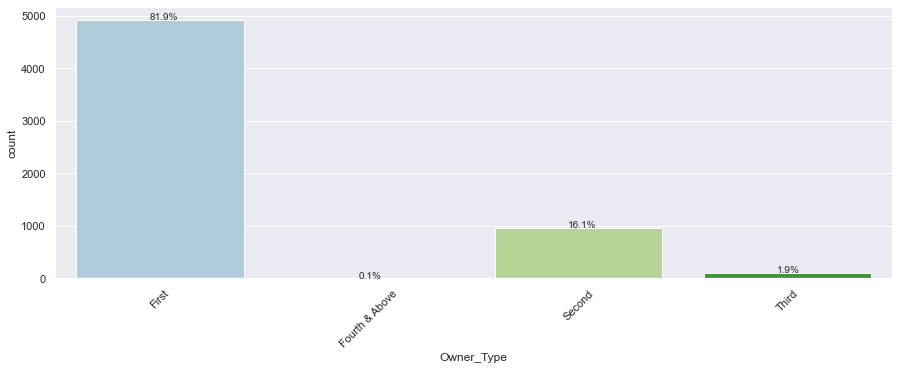

<IPython.core.display.Javascript object>

In [1426]:
percent_bar(df, "Owner_Type")

- Most cars that are being sold are by first owners, with the next common being second owners but at a much smaller number

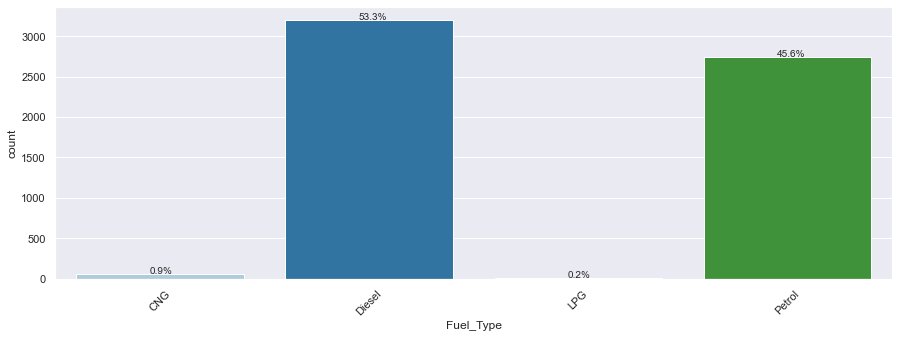

<IPython.core.display.Javascript object>

In [1427]:
percent_bar(df, "Fuel_Type")

- Most common fuel type is diesel with Petrol following closely behind

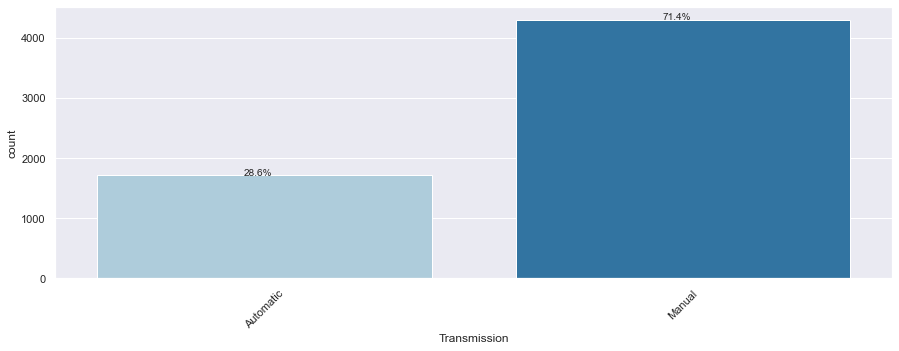

<IPython.core.display.Javascript object>

In [1428]:
percent_bar(df, "Transmission")

- Most cars are manual transmission with automatic being less than half that of manual.

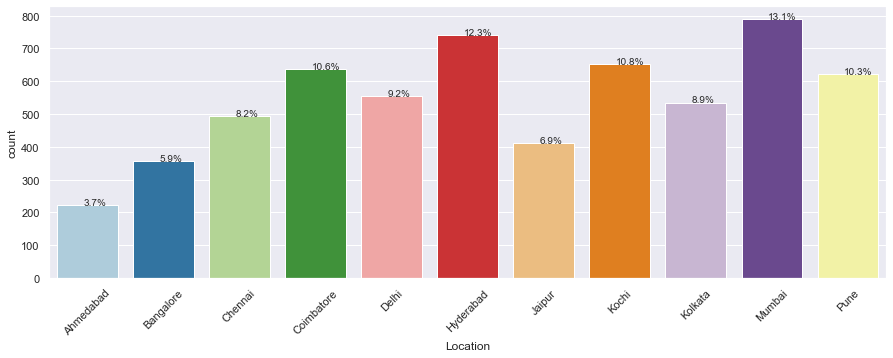

<IPython.core.display.Javascript object>

In [1429]:
percent_bar(df, "Location")

- With the cars that are being sold in India, most are from Mumbai at 13% with next most from Hyderabad. There seems to be a decent spread of cars being sold bought from various regions.

In [1430]:
# Outlier treatment for numerical variables
Q1 = df_outliertreat.quantile(0.25)
Q2 = df_outliertreat.quantile(0.5)
Q3 = df_outliertreat.quantile(0.75)

IQR = Q3 - Q1
Min = Q1 - (1.5 * IQR)
Max = Q3 + (1.5 * IQR)


df = df[
    ~(
        (df[["Kilometers_Driven", "Power", "Engine", "Mileage"]] < Min)
        | (df[["Kilometers_Driven", "Power", "Engine", "Mileage"]] > Max)
    ).any(axis=1)
]

<IPython.core.display.Javascript object>

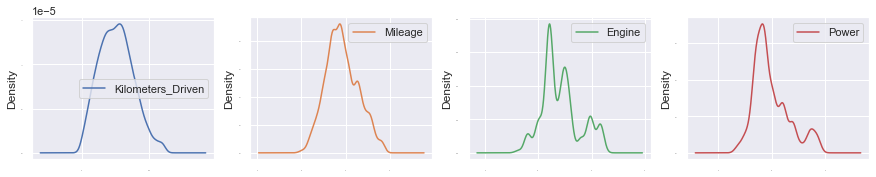

<IPython.core.display.Javascript object>

In [1431]:
df_outliertreat = df[["Kilometers_Driven", "Mileage", "Engine", "Power"]]
df_outliertreat.plot(
    kind="density",
    subplots=True,
    layout=(4, 4),
    sharex=False,
    legend=True,
    fontsize=1,
    figsize=(15, 12),
)
plt.show()

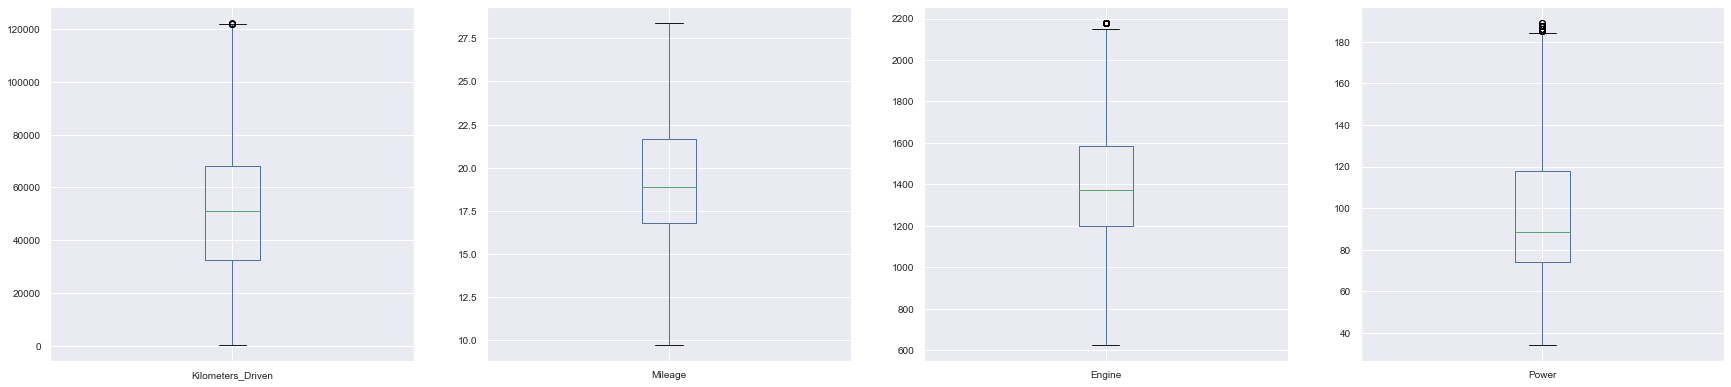

<IPython.core.display.Javascript object>

In [1432]:
df_outliertreat.plot(
    kind="box",
    subplots=True,
    layout=(4, 4),
    sharex=False,
    sharey=False,
    fontsize=10,
    figsize=(30, 30),
)
plt.show()

### Bivariate

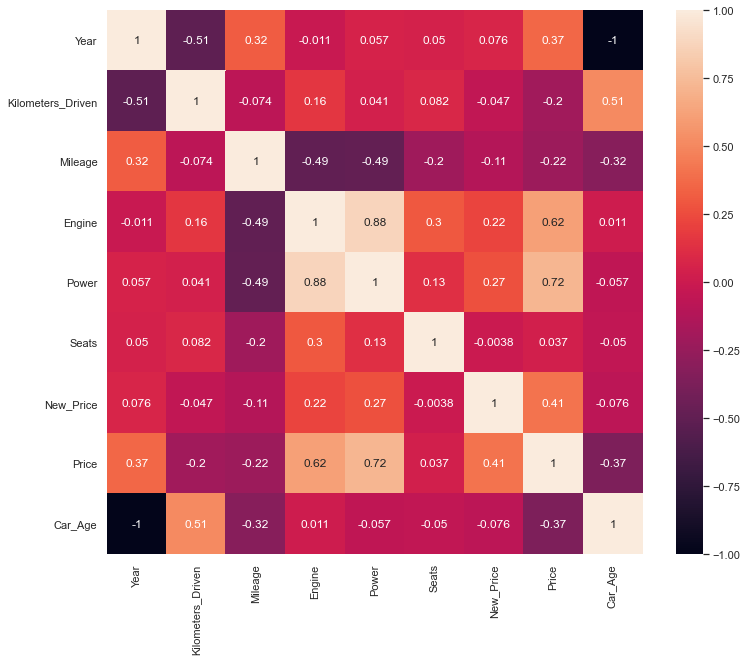

<IPython.core.display.Javascript object>

In [1433]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

- Engine and Power have a strong correlation of 0.82
- Engine and Price and Power and Price also display a strong correlation as well
- Year and Car age show an obvious correlation due to one variable being used to calculate the other
- Mileage has a negative correlation with Price, Car age, Engine and Power
- Price and Car age show a relative negative correlation

<AxesSubplot:xlabel='Owner_Type', ylabel='Price'>

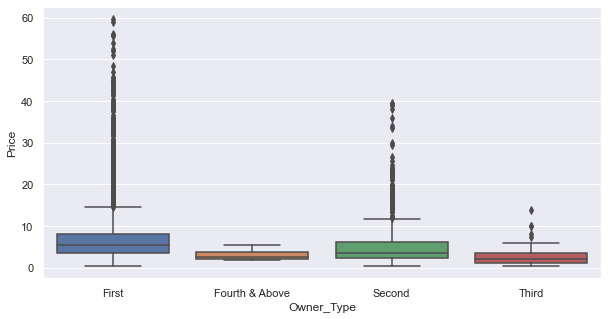

<IPython.core.display.Javascript object>

In [1434]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Owner_Type", y="Price", data=df)

- First owners seem to very slightly sell for higher prices than the rest, with second owners following closely

<AxesSubplot:xlabel='Transmission', ylabel='Price'>

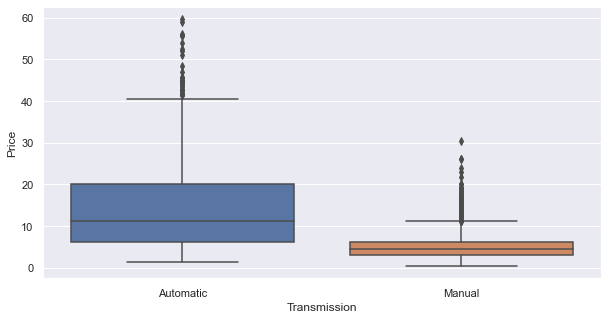

<IPython.core.display.Javascript object>

In [1435]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Transmission", y="Price", data=df)

- It seems like automatic generally tends to sell for higher prices than manual transmission

<AxesSubplot:xlabel='Fuel_Type', ylabel='Price'>

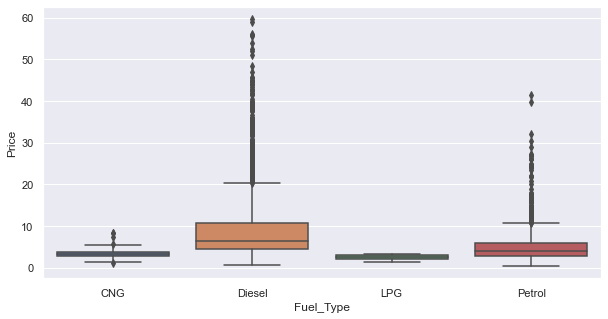

<IPython.core.display.Javascript object>

In [1436]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Fuel_Type", y="Price", data=df)

- Diesel has a wider spread than the other types of fuel but both diesel and petrol sell for higher than CNG or LPG Fuel types

<AxesSubplot:xlabel='Location', ylabel='Price'>

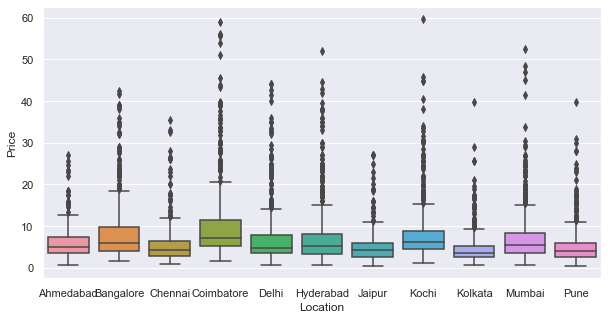

<IPython.core.display.Javascript object>

In [1437]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Location", y="Price", data=df)

- There doesn't seem to be a significant difference in prices between cars sold from various regions

### Variable Transformation

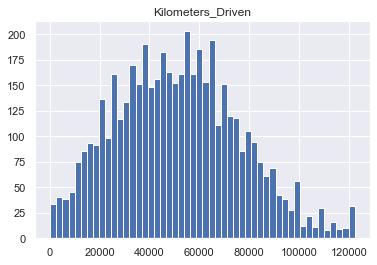

0


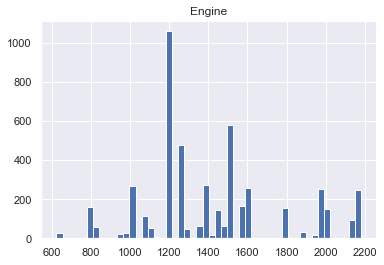

0


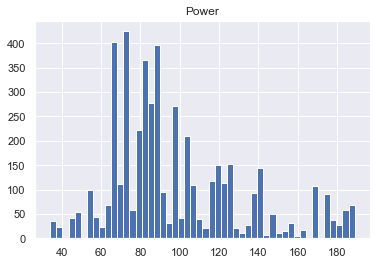

0


<IPython.core.display.Javascript object>

In [1438]:
cols_to_log = ["Kilometers_Driven", "Engine", "Power"]
for colname in cols_to_log:
    plt.hist(df[colname], bins=50)
    plt.title(colname)
    plt.show()
    print(np.sum(df[colname] <= 0))

Most of these are pretty skewed so I will be running a log transformation on them

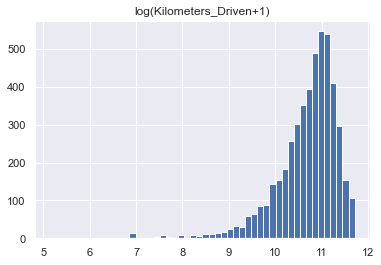

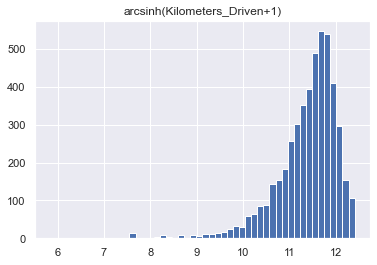

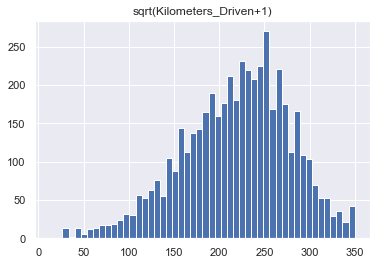

<IPython.core.display.Javascript object>

In [1439]:
plt.hist(np.log(df["Kilometers_Driven"] + 1), 50)
plt.title("log(Kilometers_Driven+1)")
plt.show()
plt.hist(np.arcsinh(df["Kilometers_Driven"] + 1), 50)
plt.title("arcsinh(Kilometers_Driven+1)")
plt.show()
plt.hist(np.sqrt(df["Kilometers_Driven"] + 1), 50)
plt.title("sqrt(Kilometers_Driven+1)")
plt.show()

The log function did a pretty good job of normalizing the distribution but sqrt seems slightly better

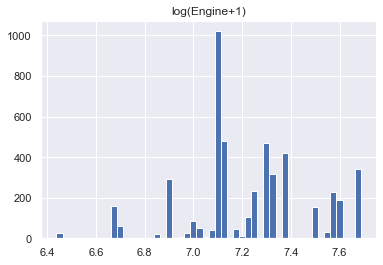

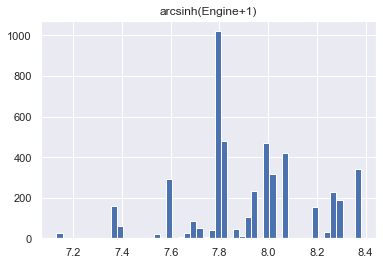

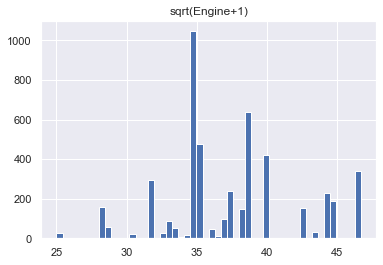

<IPython.core.display.Javascript object>

In [1440]:
plt.hist(np.log(df["Engine"] + 1), 50)
plt.title("log(Engine+1)")
plt.show()
plt.hist(np.arcsinh(df["Engine"] + 1), 50)
plt.title("arcsinh(Engine+1)")
plt.show()
plt.hist(np.sqrt(df["Engine"] + 1), 50)
plt.title("sqrt(Engine+1)")
plt.show()

- The transformation does not seem to have made too much of a difference but still relatively normally distributed.

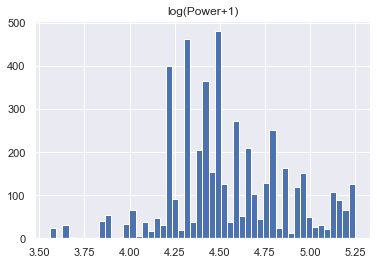

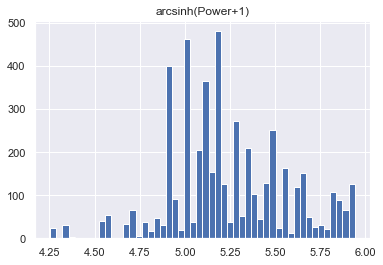

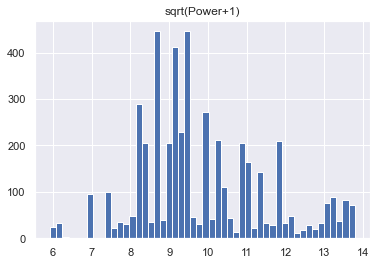

<IPython.core.display.Javascript object>

In [1441]:
plt.hist(np.log(df["Power"] + 1), 50)
plt.title("log(Power+1)")
plt.show()
plt.hist(np.arcsinh(df["Power"] + 1), 50)
plt.title("arcsinh(Power+1)")
plt.show()
plt.hist(np.sqrt(df["Power"] + 1), 50)
plt.title("sqrt(Power+1)")
plt.show()

- The log transformation here seems to have normally distributed the power values.

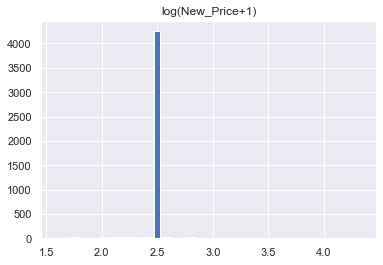

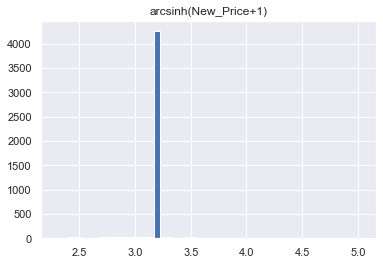

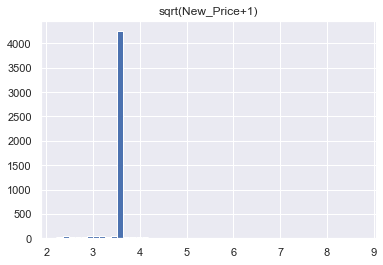

<IPython.core.display.Javascript object>

In [1442]:
plt.hist(np.log(df["New_Price"] + 1), 50)
plt.title("log(New_Price+1)")
plt.show()
plt.hist(np.arcsinh(df["New_Price"] + 1), 50)
plt.title("arcsinh(New_Price+1)")
plt.show()
plt.hist(np.sqrt(df["New_Price"] + 1), 50)
plt.title("sqrt(New_Price+1)")
plt.show()

- There does not seem to be a difference in skewness after the transformations here

In [1443]:
# Creating new column with column name and log appended
for colname in cols_to_log:
    df[colname + "_log"] = np.log(df[colname] + 1)
df.drop(cols_to_log, axis=1, inplace=True)

<IPython.core.display.Javascript object>

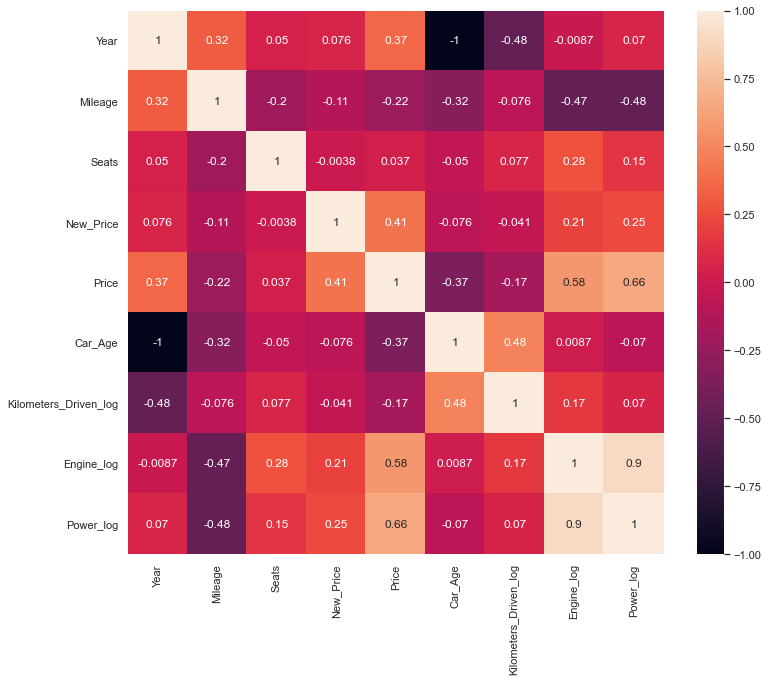

<IPython.core.display.Javascript object>

In [1444]:
# showing modified log heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

- Log of engine and log of power highly correlated
- km driven and year are also relatively negatively correlated
- engine_log and price are strongly correlated as well as the power_log and price

### Building Model

In [1445]:
# defining the dependent variable
df.drop(["Name"], axis=1, inplace=True)
ind_vars = df.drop(["Price"], axis=1)
dep_var = df[["Price"]]

<IPython.core.display.Javascript object>

In [1446]:
# creating dummies for categorical variables
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["category"]).columns.tolist(),
        drop_first=True,
    )
    return x


ind_vars = encode_cat_vars(ind_vars)
ind_vars.head()

,Year,Mileage,Seats,New_Price,Car_Age,Kilometers_Driven_log,Engine_log,Power_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land Rover,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini Cooper,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,2010,26.60,5.0,11.39,11,11.184435,6.906755,4.080246,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2015,19.67,5.0,11.39,6,10.621352,7.367077,4.845761,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2011,18.20,5.0,8.61,10,10.736418,7.090077,4.496471,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2012,20.77,7.0,11.39,9,11.373675,7.130099,4.497139,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2013,15.20,5.0,11.39,8,10.613271,7.585281,4.954418,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [1447]:
ind_vars.shape

(4826, 54)

<IPython.core.display.Javascript object>

In [1448]:
# splitting into training and testing data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    ind_vars, dep_var, test_size=0.3, random_state=1
)

<IPython.core.display.Javascript object>

In [1449]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 3378
Number of rows in test data = 1448


<IPython.core.display.Javascript object>

In [1450]:
# finding lin regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

In [1451]:
coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_.flatten(), lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
Year,7.470199e+11
Mileage,-1.239014e-01
Seats,3.518677e-02
New_Price,2.209892e-01
Car_Age,7.470199e+11
Kilometers_Driven_log,-8.147469e-01
Engine_log,2.009468e-01
Power_log,4.468614e+00
Location_Bangalore,1.425608e+00
Location_Chennai,2.146144e-01


<IPython.core.display.Javascript object>

In [1452]:
def adj_r2(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = ind_vars.shape[0]
    k = ind_vars.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Model performance check
def model_perf(model, inp, out):

    y_pred = model.predict(inp)
    y_act = out.values

    return pd.DataFrame(
        {
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "MAE": mean_absolute_error(y_act, y_pred),
            "R^2": r2_score(y_act, y_pred),
            "Adjusted R^2": adj_r2(inp, y_act, y_pred),
        },
        index=[0],
    )

<IPython.core.display.Javascript object>

In [1453]:
# finding RMSE, MAE, and  𝑅2 as well as adjusted R2


# Checking model performance on train set
print("Training Performance\n")
print(model_perf(lin_reg_model, x_train, y_train))

# Checking model performance on test set
print("\n\nTest Performance\n")
print(model_perf(lin_reg_model, x_test, y_test))

Training Performance

       RMSE       MAE       R^2  Adjusted R^2
0  2.710658  1.642484  0.849208      0.846758


Test Performance

       RMSE      MAE       R^2  Adjusted R^2
0  2.619638  1.60788  0.844151       0.83811


<IPython.core.display.Javascript object>

The training and testing 𝑅2 are 0.84 and 0.83, indicating that the model explains 84% and 83% of the total variation in the train and test sets respectively. These scores are comparable.

RMSE values on the train and test sets are also comparable which exhibits that this model is not overfitting.

MAE indicates that our current model is able to predict price ratings within a mean error of 1.76 on the test set.


Conclusions:

With this model we were able to explain 84% of variation in data, however the MAE could be improved due to the amount of error.

This model shows that the most significant predictors of price of used cars in this data set are age, engine power, mileage, km driven, seat number and transmission.
The Newer cars seem to sell for higher prices as do those with an increasing amount of seats. Because older cars generally have higher mileage, they tend to sell for a lower price as well.
Brand is also incredibly important in terms of predicting the price so higher end brands such as porche and bmw's, etc will generally trend towards higher selling prices while cars like honda and hyundai are lower end and will be more budget friendly/generally easier to sell due to affordability.

Most of the cars in this set are manual so increasing the number of automatic transmission cars may aid in selling as well.

Overall, marketing towards the highest demand will lead to best sales so marketing quality used cars towards those who can afford it will lead to best increase in sales.


